In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
df.head()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,Onesize,wallets/lino-perros/lino-perros-women-peach-co...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",wallets,lino-perros,467,36
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops/mast--harbour/mast--harbour-men-nav...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",flip-flops,mast--harbour,715,55
2,Printed A-line Kurta,Biba,4.3,66,1999,1599,"S,M,L,XL,XXL,3XL",kurtas/biba/biba-women-off-white--black-printe...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurtas,biba,400,20
3,Girls Floral Printed T-shirt,Anthrilo,0.0,0,599,539,"7-8Y,8-9Y,9-10Y",tshirts/anthrilo/anthrilo-girls-white-floral-p...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tshirts,anthrilo,60,10
4,Women Printed Kurta with Skirt,FASHION DWAR,0.0,0,2899,2899,"S,M,L,XL",kurta-sets/fashion-dwar/fashion-dwar-women-mul...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurta-sets,fashion-dwar,0,0


### 1. How many unique products are there in the dataset? (5 marks)
You need to find product ID of each product from product_link and then find the number of unique product ids

 Finding Unique Products as per their Product ID
 Removing Products with Duplicate Product ID

In [2]:
df['prod_id'] = df['product_link'].str.extract('(\d+)/buy')

In [3]:
df.drop_duplicates(subset="prod_id",inplace=True)

In [4]:
df['product_name']=df['product_name'].str.extract('([a-zA-Z ]+)',expand=False)

In [7]:
df["prod_id"].nunique()

146435

In [8]:
df.groupby("product_name")["prod_id"].nunique().count()

37344

No. of Unique product ids 146435
No. of Unique product based on product ids : 37344

### 2. What is the average rating of the products? (2 mark)

In [10]:
df.rating[(df.rating>0) & (df.rating_count>0)].mean().round(1)

4.2

Average rating of the products neglecting 0 ratings and rating count is 4.2 (rounded to nearest two digits to the decimal)

## 3. What is the average discount percentage of the products? (1 mark)

In [12]:
df['discount_percent'].mean().round(1)

37.2

Average discounted price is 37.2 (rounded to nearest two digits to the decimal)

## 4. What are the top 5 most expensive products? (2 marks)

In [13]:
df.nlargest(5,["marked_price"])["product_name"].values

array(['Lord Krishna Showpiece', 'Durga Maa On Lion Showpiece',
       'Men Stainless Steel Straps Multi Function Automatic Motion Watch',
       'Men Stainless Steel Straps Multi Function Automatic Motion Watch',
       'Men Leather Straps Multi Function Automatic Motion Watch'],
      dtype=object)

Top 5 most expensive products considering market price are  
1)Lord Krishna Showpiece

2)Durga Maa On Lion Showpiece

3)Men Stainless Steel Straps Multi Function Automatic Motion Watch

4)Men Stainless Steel Straps Multi Function Automatic Motion Watch

5)Men Leather Straps Multi Function Automatic Motion Watch

## 5. What are the top 10 brands by the number of products in the dataset? (2 mark)

In [14]:
df["brand_name"].value_counts().sort_values(ascending=False)[:10]

Roadster                 4557
Mast & Harbour           2397
DressBerry               2073
H&M                      1998
Anouk                    1784
max                      1772
HRX by Hrithik Roshan    1734
Puma                     1667
MANGO                    1625
HERE&NOW                 1612
Name: brand_name, dtype: int64

Top 10 brands by no.of products:
Roadster                
Mast & Harbour           
DressBerry               
H&M                      
Anouk                    
max                      
HRX by Hrithik Roshan    
Puma                     
MANGO                    
HERE&NOW                 

## 6. List top 5 brands with maxiumum average rating of products? (2 marks)
Neglect the products which are not reviewed by any person

In [17]:
df.brand_name[(df.rating_count>0)&(df.rating>df.rating.mean())].value_counts().sort_values(ascending=False)[:5]

Roadster                 3686
Mast & Harbour           1906
DressBerry               1607
HIGHLANDER               1378
HRX by Hrithik Roshan    1360
Name: brand_name, dtype: int64

Top 5 Brands with maximum average Rating
Roadster                 
Mast & Harbour           
DressBerry               
HIGHLANDER               
HRX by Hrithik Roshan    

## 7. Plot a histogram of the distribution of ratings of following brand. (3 marks)
H&M
max
Puma
MANGO
Neglect the products which are not reviewed by any person

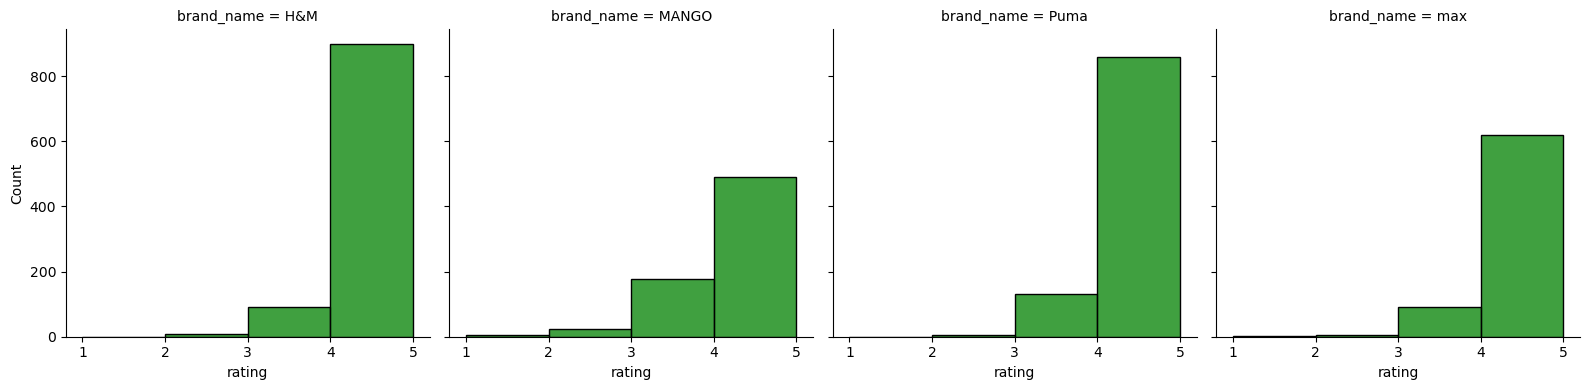

In [18]:
q=df['brand_name'].loc[df.brand_name.isin(["H&M","max","Puma","MANGO"])]
w=df['rating'].loc[df.rating_count>0]

g = sns.displot(data=df, x=w, col=q, col_wrap=4, common_bins=True, bins=4, height=4,color="green")

## 8. What is the distribution of discounts by brand for specific brands mentioned below? (2 marks)
H&M
max
Puma
MANGO
Neglect the products which are not reviewed by any person. Neglect the products which are not on any discount.

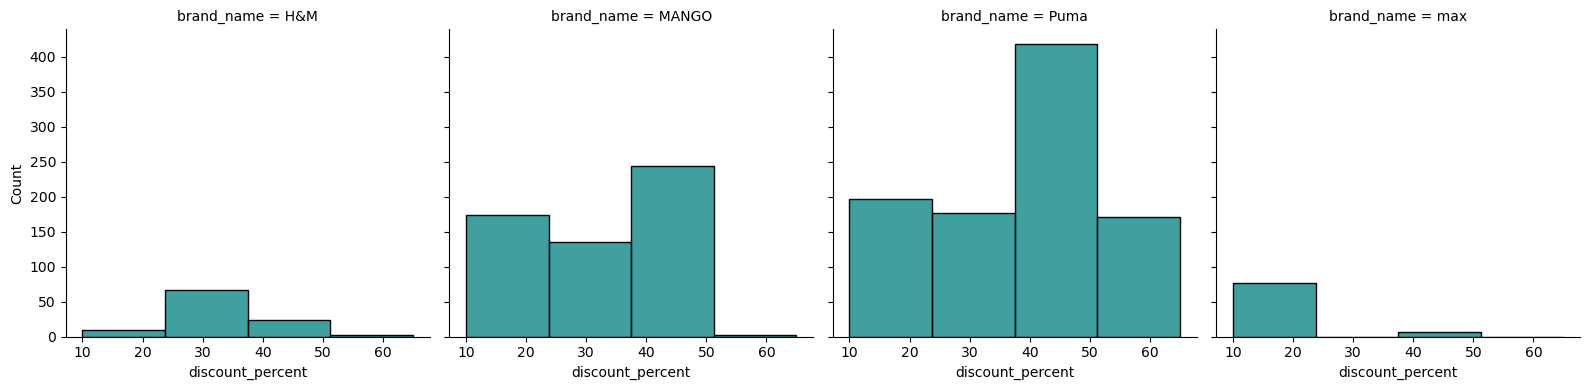

In [19]:
q=df['brand_name'].loc[df.brand_name.isin(["H&M","max","Puma","MANGO"])]
w=df['discount_percent'].loc[(df.rating_count>0) &(df.discount_percent>0)]

g = sns.displot(data=df, x=w, col=q, col_wrap=4, common_bins=True, bins=4, height=4,color="teal")

## 9. Is there any trend or pattern you can find between discount percent and rating of the product? (3 marks)

Text(0.5, 1.0, 'Discount/Rating Trend Analysis')

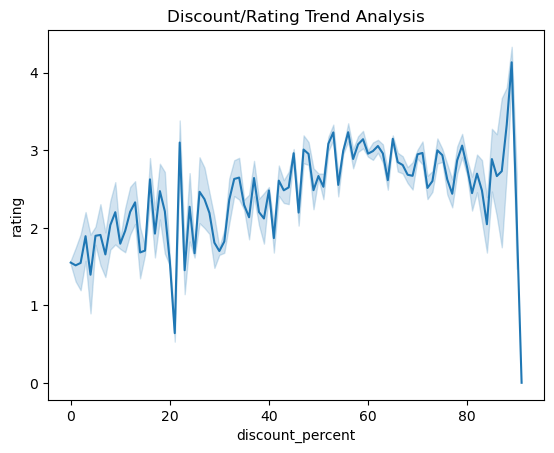

In [20]:
sns.lineplot(data = df,x="discount_percent",y="rating")
plt.title('Discount/Rating Trend Analysis')

Inference from the above trends is that rating for the products are 1.5 to 3.2 from 0 to 82 percent discounts and the rating tends to drop drastically to 0 if the discount is higher than 85%
The most rated products are in between 82 to 85
The lines tend to show, the quality of the products decline when the discount is high and the quality is good when its moderate

## 10. What are the top 10 most popular tags in the dataset? (2 marks)

In [21]:
df.product_tag.value_counts().sort_values(ascending=False)[:10]

tshirts         14885
shirts          10659
dresses         10350
tops             7773
kurta-sets       7156
kurtas           7077
jeans            6957
trousers         5145
casual-shoes     4719
handbags         4367
Name: product_tag, dtype: int64

Top 10 most popular tags:
tshirts         
shirts          
dresses         
tops             
kurta-sets       
kurtas           
jeans            
trousers         
casual-shoes     
handbags         

## 11. Are there any relations between the rating and number of people who rated the products? (4 marks)

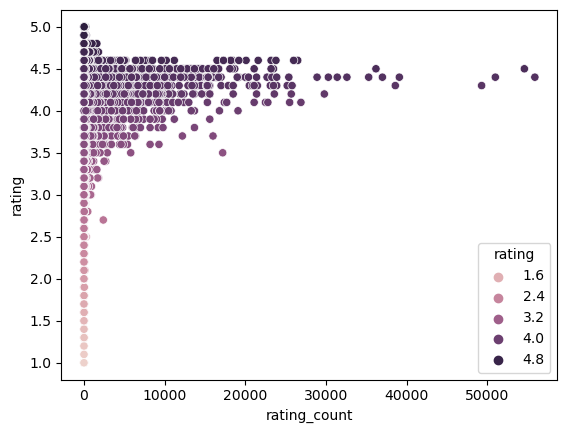

In [22]:
r=df.rating_count.loc[(df.rating>0) &(df.rating_count>0)]
t=df.rating.loc[(df.rating>0) & (df.rating_count>0)]
qd=sns.scatterplot(x=r, y=t, data=df,hue=t)

As per the above scatter plot, we can see the higher ratings are available with the more no of people rating the products

## 12. What are the top 10 Most Expensive brands? (3 marks)
Use marked price as the reference to find the most expensive brand

In [23]:
df.sort_values('marked_price', ascending=False).drop_duplicates(['brand_name'])["brand_name"][:10]

27039               eCraftIndia
117809                 EARNSHAW
29599                 D1 Milano
65674                    Masaba
107767                    dyson
42564                Victorinox
149277                 Tom Ford
64803                    TISSOT
123027    Versace Jeans Couture
84655              Calvin Klein
Name: brand_name, dtype: object

Top 10 Most expensive Brands based on the marked price value:
eCraftIndia

EARNSHAW

D1 Milano

Masaba

dyson

Victorinox

Tom Ford

TISSOT

Versace Jeans Couture

Calvin Klein

## 13. What are the top 10 Most Expensive Product Category? (4 marks)
Use marked price as the reference to find the most expensive brand

In [24]:
df.sort_values('marked_price', ascending=False).drop_duplicates(['product_tag'])["product_tag"][:10]

27039         showpieces
117809           watches
65674      lehenga-choli
107767    hair-appliance
149277        sunglasses
123027             jeans
84655        trolley-bag
114597           carpets
83658            tshirts
8809              shirts
Name: product_tag, dtype: object

Top 10 Most expensive product categories:
showpieces
watches
lehenga-choli
hair-appliance
sunglasses
jeans
trolley-bag
carpets
tshirts
shirts

## 14. Analyse the Violen Plot of watches of following brands mentioned below ? (5 marks)
Take Marked Price for Reference
Take product_tag as watches
Take brand_tag as tommy-hilfiger, daniel-wellington, armani-exchange, emporio-armani, earnshaw, tissot
Make sure to write your inference based on the violen plot of following watch brands price

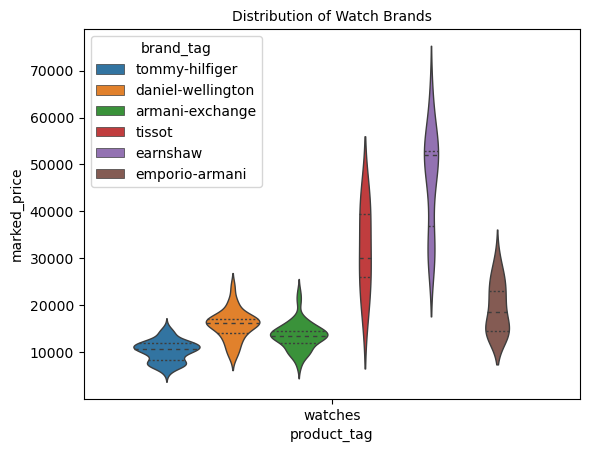

In [25]:
qw=df.loc[(df.product_tag.isin(["watches"])) &(df.brand_tag.isin(["tommy-hilfiger", "daniel-wellington", "armani-exchange", "emporio-armani", "earnshaw", "tissot"]))]
tp=sns.violinplot(x='product_tag', y='marked_price', data=qw,hue='brand_tag',inner='quartile',
                linewidth=1)
tp.set_title('Distribution of Watch Brands', fontsize=10);

Asper the above plot, we could infer some points as below:
Earnshaw watches has  a steep outlier values than anyother watch brands in this chart as it is the onew with costlier watches

Tissot outlier values correspond the 75% percentile of the Earnshaw brand

Compared to Emprio-Armani, TIssot and Earnshaw, Tommy-Hilfiger, Daniel-Wellington and Armani-Exchange have more products in the 10000 to 18000 price range.

For the below 3 brands , 50% percentile as below:
For Tommy majority of the watches are in 10000 price range
For Daniel wellington majority of the watches are in 18000 price range
For Armani-Exchange majority of the watches are in 15000 price range

Combining all the above inferences, we could assume that 
Earnshaw is the costliest brand among watches as majority 
Tissot has a wide range of price for its watches
Tommy hilfiger,Daniel wellington,Armani-Exchange are among the cheapest of these brands
Empori armani is a moderately priced brand

## 15. List top 5 brands which are having most wide range of products

In [26]:
df.groupby("brand_name")["product_tag"].count().sort_values(ascending=False)[:5]

brand_name
Roadster          4557
Mast & Harbour    2397
DressBerry        2073
H&M               1998
Anouk             1784
Name: product_tag, dtype: int64

Top 5 Brands with wide range of product types (based on product_tag) are:
Roadster

Mast & Harbour

DressBerry

H&M

Anouk